enter a moving average 30
enter another moving average 50
initial capital =  100000
enter a start date format YYYY-MM-DD  2016-2-1
enter a end date format YYYY-MM-DD  2016-10-1
what kind of analysis: simma, macross, boll:   boll
  enter period,stddev - separated by space20 2
moving average   30 days
second ma 50 days
stock   AMZN
period   20
std dev   2
657.909973145
PROFIT/LOSS -3809.82462113
            s_adjclose       close  moving_avg  moving_avg2  moving_fast  \
Date                                                                       
2015-12-14  657.909973  657.909973         NaN          NaN          NaN   
2015-12-15  658.640015  658.640015         NaN          NaN          NaN   
2015-12-16  675.770020  675.770020         NaN          NaN          NaN   
2015-12-17  670.650024  670.650024         NaN          NaN          NaN   
2015-12-18  664.140015  664.140015         NaN          NaN          NaN   
2015-12-21  664.510010  664.510010         NaN          NaN          Na

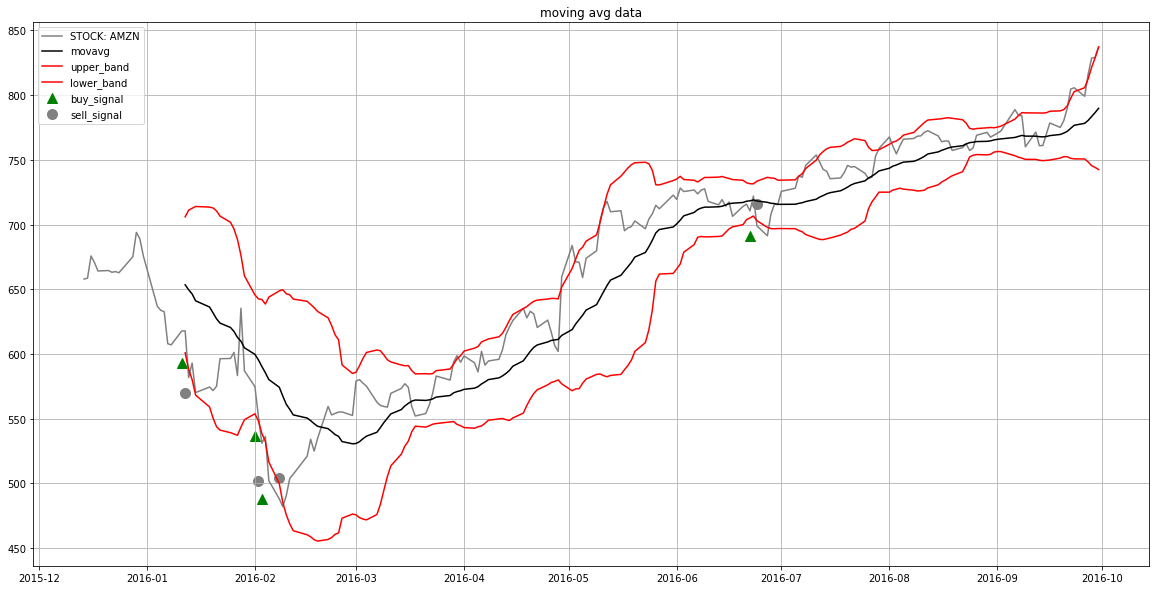

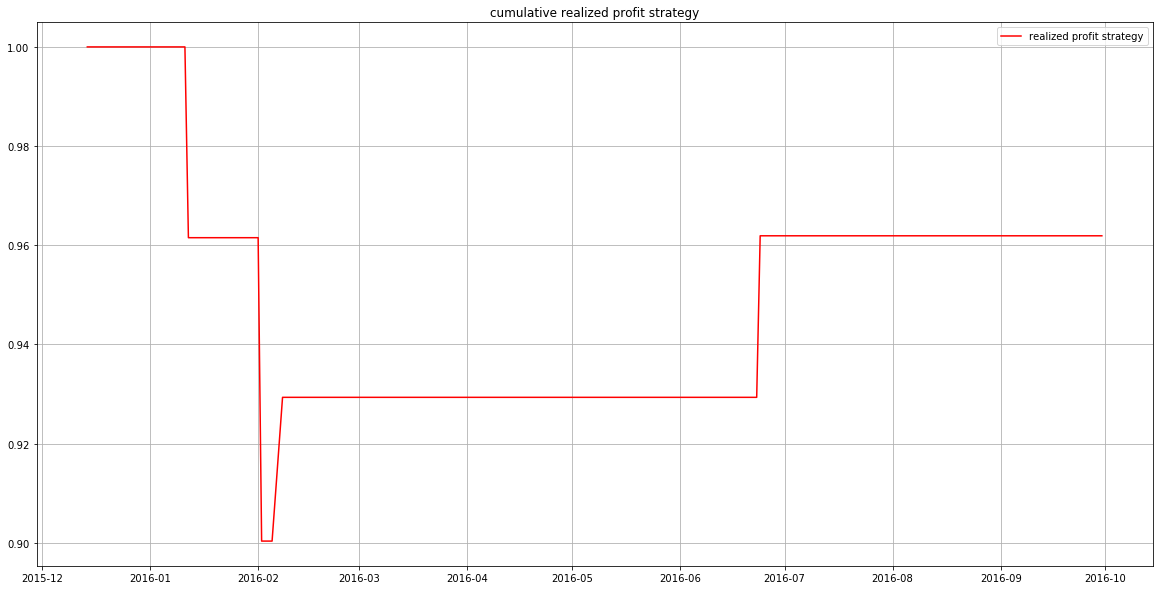

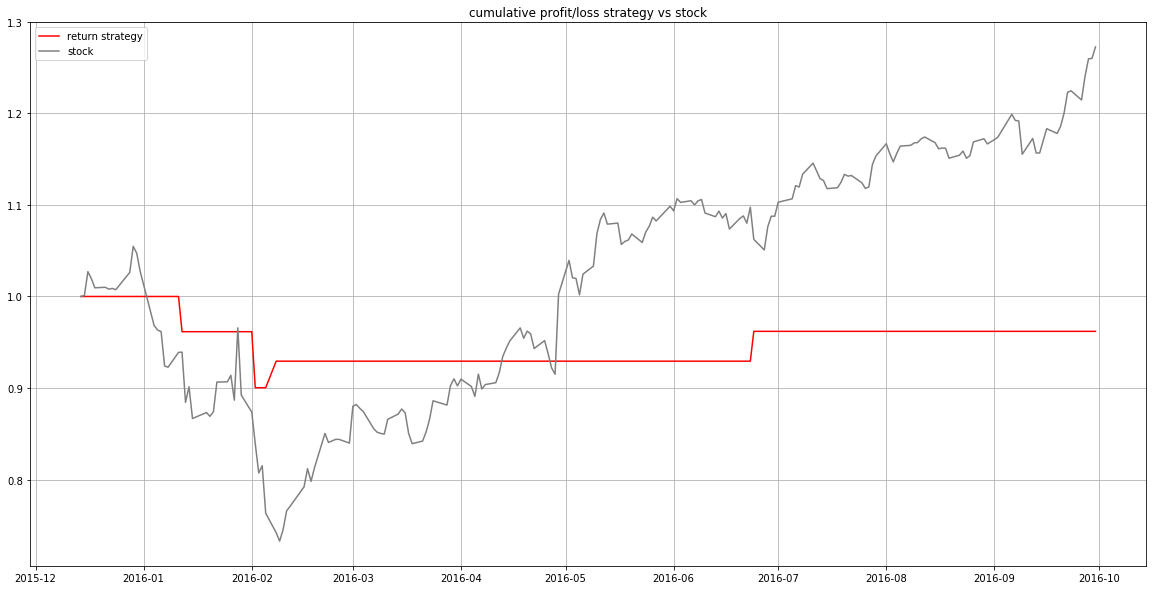

In [1]:

import pandas_datareader as pdr

 

from pandas_datareader import data, wb

 

from datetime import date

 

from datetime import datetime, timedelta

 

import numpy as np

 

import matplotlib.pyplot as plt

 

import pandas as pd

 

pd.set_option('display.max_columns', 999)

 

pd.set_option('display.max_rows', 999)

 

    #---- THIS USES CLOSING STOCK PRICE --

   

 

def movavg(start_date, end_date, ticker1, ticker2):

    #--SIMPLE MOVING AVERAGE--

     

    #----download stock data------

    #get the data from Yahoo Finance

    #stock1 = pdr.get_data_yahoo(ticker1, start_date, end_date)

    #stock2 = pdr.get_data_yahoo(ticker2, start_date, end_date)

    dt = pd.to_datetime(start_date, format='%Y/%m/%d') - datetime.timedelta(days=50)

    dt2 = pd.to_datetime(end_date, format='%Y/%m/%d') + datetime.timedelta(days=0)

    #dt = pd.to_datetime(start_date, format='%Y/%m/%d') - timedelta(days=50)

    stock1 = pdr.get_data_yahoo(ticker1, dt, dt2)

    #print(dt)

    #return_stock1 = stock1.resample('D').last()

    #return_stock2 = stock2.resample('W').last()

    #print(return_stock1)

    data = pd.DataFrame({'s_adjclose': stock1['Adj Close']})# {'mkt_close': stock1['Close']})#, index=return_stock1.index)

    #data1= pd.DataFrame({'s_adjclose': stock1['Adj Close']})

 

  

    #----moving average value is 'x'---

    #x=50
    period=20
    stddev=2

    print("moving average  ",x,"days")

    print("second ma",b, "days")

    print("stock  ",s1) 

    print("period  ",period)

    print("std dev  ",stddev)

    per=int(period)
    
    dev=int(stddev)
    

    if x < b:

        fast=x

        slow=b

    else:

        fast=b

        slow=x

 

 

    #-- trading signal section---

    #data[['s_returns', 'm_returns']] = np.log(data[['s_adjclose','m_adjclose']]/data[['s_adjclose','m_adjclose']].shift(1))

    data['close']=stock1['Close']

    data['moving_avg'] = data['close'].rolling(x).mean()

    data['moving_avg2'] = data['close'].rolling(b).mean()

    data['moving_fast'] = data['close'].rolling(fast).mean()

    data['moving_slow'] = data['close'].rolling(slow).mean()

    data['moving_boll'] = data['close'].rolling(per).mean()

    data['std_dev']=data['close'].rolling(per).std()
    
    data['upper_bnd']= data['moving_boll']+ (data['std_dev']*dev)
    data['lower_bnd']= data['moving_boll']- (data['std_dev']*dev)
   
    
    
 

   

    #----decision-------#

    if type=="simma":

        data['l/s_signal']=data['close']-data['close'].rolling(x).mean()

    elif type=="macross":

        data['l/s_signal']=data['moving_fast']-data['moving_slow']
    
    else:
        
        data['l/s_signal']=data['close']-data['lower_bnd']
        #data['l/s_signal']=data['close']-data['lower_bnd']
   
    #------#
    data['boll_sell']=data['close']-data['upper_bnd']
    
    

    if type=="boll":
        data['buy_or_sell'] = data['l/s_signal'].apply(lambda x: 'long' if x <= 0 else 'short')
    else:
        data['buy_or_sell'] = data['l/s_signal'].apply(lambda x: 'long' if x >= 0 else 'short')
        
    
    if type=="boll":
         data['buy_or_sell2'] =data['boll_sell']
        #data['buy_or_sell2'] =data['l/s_signal'].shift(-1)
         data['l/s_signal2'] = data['buy_or_sell2'].apply(lambda x: 'long' if x <= 0 else 'short')
        #data['l/s_signal2'] = data['buy_or_sell2'].apply(lambda x: 'long' if x <= 0 else 'short')

    else:
        data['buy_or_sell2'] = data['l/s_signal'].shift(-1)
        data['l/s_signal2'] = data['buy_or_sell2'].apply(lambda x: 'long' if x >= 0 else 'short')

    i = data['l/s_signal2']

    data['count'] =i.ne(i.shift(-1)).cumsum()
    
    if type=="boll":
        data['cost'] = np.where(data['buy_or_sell'].shift(-1)==data['l/s_signal2'].shift(-1), 0, data['close'].shift(-3))
        
    else:
        data['cost'] = np.where(data['buy_or_sell'].shift(-1)==data['l/s_signal2'].shift(-1), 0, data['close'].shift(-3))

    # data['cost'] = np.where(data['buy_or_sell'].shift(-1)==data['l/s_signal2'].shift(-1), 0,

                          #  np.where(data['buy_or_sell2'].isna()) & (data['l/s_signal2']=='short'),data['s_adjclose']

                              #,data['s_adjclose'].shift(-3))                   

    data['cost_adj'] = np.where(data['l/s_signal2'].shift(-1)=='long',data['cost']*-1,data['cost'])

    #data['cost_adj2'] = data['cost_adj']

    data['cost_adj2'] = np.where((data['buy_or_sell2'].isna()) & (data['count']==0),data['close'],data['cost_adj'])

    data['cost_adj2']=data['cost_adj2'].replace(0, np.NaN).ffill()

    data['cash']=np.cumsum(data['cost_adj'])

    data['open/close pos'] = np.where(data['count'] % 2, 'open', 'cls')

 

       

    #--calculate realized profit/loss per trade----

    data['real_p'] = np.where((data['open/close pos'] == 'open') &(data['count'] == 1) ,1,   #when... then

                     np.where((data['open/close pos'] == 'cls')& (data['cost_adj'] > 0),data['cost_adj2']/(data['cost_adj2'].shift(1)*-1),

                     #np.where((data['open/close pos'] == 'cls')& (data['cost_adj'].shift(-1).isna()) & (data['open/close pos'].shift(1)=='open'),data['cost_adj2'].shift(-1)/(data['cost_adj2']*-1)

                     np.where((data['open/close pos'] == 'cls')& (data['cost_adj'].shift(-1).isna()) & (data['open/close pos'].shift(1)=='open'),1        

                                            ,1))) 

     

    #---compounded realized p&l----

    init_val=start_cap

    init_val2=data['close'][0]

    print(init_val2)

    #print(init_val2,"starting adj close")

    data['norm_price']=data['close']/init_val2

    data['norm_price']=data['norm_price'].replace(0, np.NaN).ffill()

    #--normalize the real p&l to compare with the market--

    #data['norm_strat']=np.where(data['cost_adj']>0 ,(data['real_p']/init_val)+1,1)

    #data['norm_strat']=data['norm_strat'].replace(0, np.NaN).ffill()

    #s=data['norm_strat'].tolist()

    #data['z']=np.cumprod(s)

    #data['cum_return']=np.cumprod(data['norm_strat'])

    data['cum_return']=np.cumprod(data['real_p'])

    data['buy_signal']= np.where(data['cost_adj']<0, data['cost'],float('nan'))

    data['sell_signal']= np.where((data['cost_adj']>0) &(data['open/close pos']=='cls'), data['cost'],float('nan'))

   

    

    ending_cap=data['cum_return'].iloc[-1]

    print("PROFIT/LOSS",((ending_cap*init_val)-init_val))

 

    print(data)

    export_csv = data.to_csv (r'C:\Users\IGreenstein\Documents\financesection\movavg.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

 

  

    #--------------plot data------------------------

    fig,axis = plt.subplots(1,figsize=(20,10))

    #plt.plot(data["s_adjclose"],label= 'stock 1',color='red')

    plt.plot(data['close'],label= 'STOCK: %s'%s1,color='grey')

    #plt.plot(data["norm_mkt_price"],label= 'normalized market',color='blue')

   

    if type=="simma":

        plt.plot(data['moving_avg'],label= 'MA STOCK',color='black')
    
    elif type=="boll":
        plt.plot(data['moving_boll'],label= 'movavg',color='black')
        plt.plot(data['upper_bnd'],label= 'upper_band',color='red')
        plt.plot(data['lower_bnd'],label= 'lower_band',color='red')

    else:

        plt.plot(data['moving_fast'],label= 'MA fast',color='black')
        plt.plot(data['moving_slow'],label= 'MA slow',color='blue')

    plt.scatter(data.index, data['buy_signal'],marker='^',s=100,color='green')

    plt.scatter(data.index, data['sell_signal'],marker='o',s=100,color='grey')

    plt.title('moving avg data')

    plt.legend()

    plt.grid(True)

    plt.show()

   

         

    fig,axis = plt.subplots(1,figsize=(20,10))

    plt.plot(data['cum_return'],label= 'realized profit strategy',color='red')

    plt.gca().invert_yaxis()

    plt.title('cumulative realized profit strategy')

    plt.legend()

    plt.grid(True)

    plt.gca().invert_yaxis()

    plt.show()

 

    fig,axis = plt.subplots(1,figsize=(20,10))

    plt.plot(data['cum_return'],label= 'return strategy',color='red')

    plt.plot(data['norm_price'],label= 'stock',color='grey')

    plt.gca().invert_yaxis()

    plt.title('cumulative profit/loss strategy vs stock')

    plt.legend()

    plt.grid(True)

    plt.gca().invert_yaxis()

    plt.show()

 

 

   

    

if __name__ == "__main__":

    #using historical data 2010-2017: the market is the S&P500 !!!

    import datetime

    s1='AMZN'

    m1='^GSPC'

    y=input("enter a moving average ")

    x=int(y)

    a=input("enter another moving average ")

    b=int(a)   

    #dayz = datetime.timedelta(50)

    start_cap=100000

    print("initial capital = ",start_cap)

    start=input("enter a start date format YYYY-MM-DD  ")

    end=input("enter a end date format YYYY-MM-DD  ")

   

    type=input("what kind of analysis: simma, macross, boll:   ")

    if type =="boll":

        period,stddev=input("  enter period,stddev - separated by space").split()

        movavg(start,end,s1,m1)

    else:

        movavg(start,end,s1,m1)

   


##### 